In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import log
import pandas as pd

In [33]:
data = pd.read_csv("ht4/train.csv")
data.head()



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.5)



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
32547,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15939,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19739,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30934,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34420,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22530,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34143,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4981,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13572,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
def crea_imagenes(df, path):
    
    alto = 28
    ancho = 28
    imagenes = len(df)

    lienzo = np.zeros((alto, ancho, 1))
    tabla = np.zeros((imagenes,3))


    for x in range(0, imagenes):
        for i in range(0, alto):
            for j in range(0, ancho):
                pixel = df.iloc[x, 1+i*alto+j] #se obtiene el pixel

                lienzo[i,j] = pixel

        tabla[x,0] = df.iloc[x, 0]

        cv2.imwrite(path+str(df.iloc[x, 0])+"/img"+str(x)+".jpg", lienzo)     

        if x <= 5:
            img_out = cv2.imread(path+"img"+str(x)+".jpg")

            plt.imshow(img_out)
            plt.show()

    #print(tabla)
    
    return tabla
    

In [136]:
tabla_train = crea_imagenes(train, 'ht4/images/train/')

In [137]:
tabla_test = crea_imagenes(test, 'ht4/images/test/')

In [139]:
strTraining = 'ht4/images/train/'
strTest =     'ht4/images/test/'
strTraining

'ht4/images/train/'

In [249]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img, img_to_array

In [239]:
#dataGen = ImageDataGenerator(
#    rescale=1/255,
#    shear_range=0.5,
#    zoom_range=0.5,
#    horizontal_flip=True,
#    #vertical_flip=True
#)

In [278]:
train_datagen = ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    #vertical_flip=True
)

In [281]:
train_generator = train_datagen.flow_from_directory(
    strTraining,
    target_size = (28, 28),
    batch_size=32,
    class_mode='categorical'
)

Found 21000 images belonging to 10 classes.


In [282]:
test_datagen =  ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_generator = test_datagen.flow_from_directory(
    strTest,
    target_size = (28, 28),
    batch_size=32,
    class_mode='categorical'
)

Found 21000 images belonging to 10 classes.


In [328]:
validation_datagen =  ImageDataGenerator(
    rescale=1/255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_generator = test_datagen.flow_from_directory(
    strTest,
    target_size = (28, 28),
    batch_size=1,
    class_mode='categorical'
)

Found 21000 images belonging to 10 classes.


# **ANN**

In [283]:
from keras.models import Sequential
from keras.layers import Dense

from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten

In [362]:
ann = Sequential()

#capa de entrada
ann.add(Flatten(input_shape=(28, 28, 3)))

#primera capa oculta
ann.add(Dense(units=3000, activation='relu', kernel_initializer='uniform'))

#segunda capa oculta
ann.add(Dense(units=1000, activation='relu', kernel_initializer='uniform'))

#capa de salida
ann.add(Dense(units=1, activation='sigmoid'))
#ann.add(Dense(units=1, activation='softmax'))

In [363]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [364]:
#ann.fit(train_generator, epochs=5, validation_data=test_generator, validation_steps=800, steps_per_epoch=10)


ann.fit(train_generator, epochs=5, steps_per_epoch=10)

ann.save('ht4/images/MNIST_ann.h5')

Epoch 1/5
10/10 [==============================] - 7s 298ms/step - loss: 0.8754 - accuracy: 0.7900
Epoch 2/5
10/10 [==============================] - 3s 256ms/step - loss: 0.3916 - accuracy: 0.9000
Epoch 3/5
10/10 [==============================] - 3s 257ms/step - loss: 0.3508 - accuracy: 0.9000
Epoch 4/5
10/10 [==============================] - 3s 283ms/step - loss: 0.3411 - accuracy: 0.9000
Epoch 5/5
10/10 [==============================] - 3s 272ms/step - loss: 0.3386 - accuracy: 0.9000


# **CNN**

In [294]:
#CNN

cnn = Sequential()

#------------------- Fase Convolucional --------------------

#primera capa convolucional
cnn.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28, 28, 3), activation='relu'))

#capa de maxpooling
cnn.add(MaxPool2D(pool_size=(2,2)))

#segunda capa convolucional
cnn.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

#segunda capa de pooling
cnn.add(MaxPool2D(pool_size=(2,2)))

#capa de flattening
cnn.add(Flatten())

#------------------- Fase Artificial --------------
#primera capa oculta
cnn.add(Dense(units=128, activation='relu'))

#capa de salida
cnn.add(Dense(units=1, activation="sigmoid"))

In [297]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [331]:
history = cnn.fit(train_generator, epochs=5, validation_data=test_generator, validation_steps=800, steps_per_epoch=20)

cnn.save('ht4/images/MNIST_cnn.h5')



Epoch 1/5
20/20 [==============================] - 101s 5s/step - loss: 0.3256 - accuracy: 0.9000 - val_loss: 0.3255 - val_accuracy: 0.9000
Epoch 2/5
20/20 [==============================] - 6s 306ms/step - loss: 0.3255 - accuracy: 0.9000
Epoch 3/5
20/20 [==============================] - 5s 266ms/step - loss: 0.3255 - accuracy: 0.9000
Epoch 4/5
20/20 [==============================] - 6s 303ms/step - loss: 0.3255 - accuracy: 0.9000
Epoch 5/5
20/20 [==============================] - 6s 302ms/step - loss: 0.3253 - accuracy: 0.9000


[0, 1, 2, 3, 4]


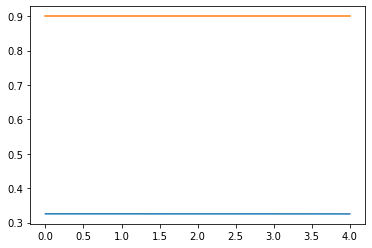

In [343]:
import matplotlib.pyplot as plt

print(history.epoch)


plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])

In [303]:
#función para predicción simple
from PIL import Image
import numpy as np
from skimage import transform
from sklearn.metrics import confusion_matrix
    

def load_and_predict_img(filname, modelo):
    np_image = Image.open(filname)
    np_image = np.array(np_image).astype('float32')/255
    np_image = transform.resize(np_image, (28,28,3))
    np_image = np.expand_dims(np_image, axis=0)
    prediction = modelo.predict(np_image)
    
    
  
    
  
    #print(prediction)

    #if (prediction[0][0] >= 0.5):
    #  salida = 'Perro'
    #else:
    #  salida = 'Gato'
  
    return prediction

In [ ]:
res = load_and_predict_img("ht4/images/test/4/img40.jpg", ann)

np.argmax(res,axis=1)

#cm = confusion_matrix(validation_generator, prediccion)
#print(cm)

# **Laboratorio # 4.  Respuestas**

# Paso 1: Cargar imagenes a carpetas clasificadas

Esto se creó la función crea_imagenes, que recibe de parámetros:
    -la etiqueta (si es train o test)
    -el path donde se depositarán las imagenes

crea_imagenes(train, 'ht4/images/train/')


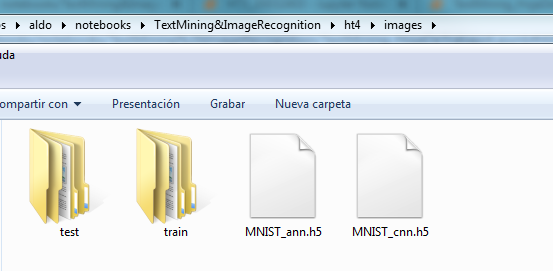

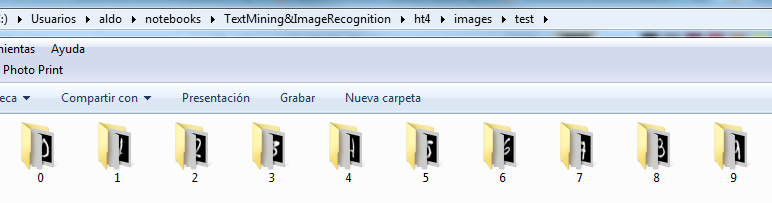

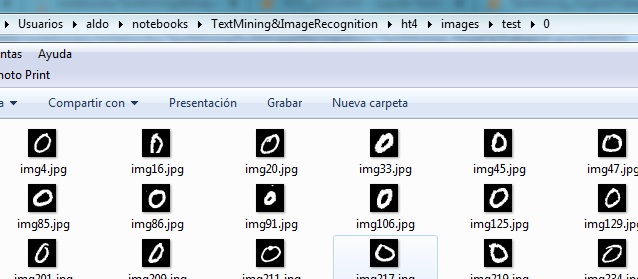



In [ ]:
tabla_train = crea_imagenes(train, 'ht4/images/train/')
tabla_test = crea_imagenes(test, 'ht4/images/test/')

# Paso 2: Se ejecuta el entrenamiento de ANN y CNN

In [366]:
ann.fit(train_generator, epochs=5, steps_per_epoch=10)

Epoch 1/5
10/10 [==============================] - 2s 219ms/step - loss: 0.3317 - accuracy: 0.9000
Epoch 2/5
10/10 [==============================] - 3s 249ms/step - loss: 0.3306 - accuracy: 0.9000
Epoch 3/5
10/10 [==============================] - 2s 204ms/step - loss: 0.3315 - accuracy: 0.9000
Epoch 4/5
10/10 [==============================] - 2s 238ms/step - loss: 0.3293 - accuracy: 0.9000
Epoch 5/5
10/10 [==============================] - 2s 194ms/step - loss: 0.3293 - accuracy: 0.9000


In [367]:
cnn.fit(train_generator, epochs=5, validation_data=test_generator, validation_steps=800, steps_per_epoch=20)

Epoch 1/5
20/20 [==============================] - 43s 2s/step - loss: 0.3253 - accuracy: 0.9000 - val_loss: 0.3253 - val_accuracy: 0.9000
Epoch 2/5
20/20 [==============================] - 3s 164ms/step - loss: 0.3253 - accuracy: 0.9000
Epoch 3/5
20/20 [==============================] - 3s 160ms/step - loss: 0.3252 - accuracy: 0.9000
Epoch 4/5
20/20 [==============================] - 3s 168ms/step - loss: 0.3252 - accuracy: 0.9000
Epoch 5/5
20/20 [==============================] - 3s 157ms/step - loss: 0.3252 - accuracy: 0.9000


# Paso 3: Se calcula la exactitud de la predicción con el Test

In [368]:
accuracy = ann.evaluate(test_generator)

657/657 [==============================] - 40s 59ms/step - loss: 0.3304 - accuracy: 0.9000


In [369]:
accuracy = cnn.evaluate(test_generator)

657/657 [==============================] - 37s 56ms/step - loss: 0.3252 - accuracy: 0.9000


# Paso 4: Conclusión ANN vs CNN

Dado los resultados se tiene para ambas redes neuronales una exactitud del 90%, sin embargo, al observar la pérdida, vemos que la de CNN es ligeramente menor a la de ANN 32% vs 33%